# What were the top reasons customers left a 5 star review at the Yard House?
## Alexandra Vucenovic 4-30-24

In [1]:
import requests
import yelpkeys_3  # file where client_id and api_key is defined with user's private app information
from textblob import TextBlob

In [2]:
APIKEY = yelpkeys_3.api_key
headers = {'Authorization': 'Bearer %s' % yelpkeys_3.api_key,}

#### website: https://www.yelp.com/biz/yard-house-east-rutherford?rr=1 
#### ask how to find API key to this link and how its connected to the websites client id

# Setup for scraping the website chosen

In [3]:
"""
Yelp Fusion API code sample.
This program demonstrates the capability of the Yelp Fusion API
by using the Search API to query for businesses by a search term and location,
and the Business API to query additional information about the top result
from the search query.
Please refer to https://docs.developer.yelp.com/docs/get-started for the API
documentation.
This program requires the Python requests library, which you can install via:
`pip install -r requirements.txt`.
Sample usage of the program:
`python sample.py --term="bars" --location="San Francisco, CA"`
"""
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib


# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode


# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= yelpkeys_3.api_key


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.


# Defaults for our simple example.
DEFAULT_TERM = 'dinner'
DEFAULT_LOCATION = 'Hoboken, NJ'
SEARCH_LIMIT = 20


def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


def get_business(api_key, business_id):
    """Query the Business API by a business ID.
    Args:
        business_id (str): The ID of the business to query.
    Returns:
        dict: The JSON response from the request.
    """
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, api_key)


def query_api(term, location):
    """Queries the API by the input values from the user.
    Args:
        term (str): The search term to query.
        location (str): The location of the business to query.
    """
    response = search(API_KEY, term, location)

    businesses = response.get('businesses')

    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return

    business_id = businesses[0]['id']

    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(API_KEY, business_id)

    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)

In [4]:
response = search(API_KEY,"dinner", 'Yard_House, Hoboken, NJ')

Querying https://api.yelp.com/v3/businesses/search ...


In [5]:
response

{'businesses': [{'id': '5frcf3YK8Of3lpGbWcGmPw',
   'alias': 'caffe-buon-gusto-hoboken',
   'name': 'Caffe Buon Gusto',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/dR55megJPO_CKEZLmGadiw/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/caffe-buon-gusto-hoboken?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ',
   'review_count': 35,
   'categories': [{'alias': 'italian', 'title': 'Italian'},
    {'alias': 'salad', 'title': 'Salad'},
    {'alias': 'pastashops', 'title': 'Pasta Shops'}],
   'rating': 4.3,
   'coordinates': {'latitude': 40.747935, 'longitude': -74.027961},
   'transactions': ['pickup', 'delivery'],
   'location': {'address1': '918 Washington St',
    'address2': '',
    'address3': None,
    'city': 'Hoboken',
    'zip_code': '07030',
    'country': 'US',
    'state': 'NJ',
    'display_address': ['918 Washington St', 'Hoboken, NJ 07030']},
   'phone': '+12017

# Checking reviews

In [8]:
pos_count = 0
neg_count = 0
neu_count = 0

for business in response['businesses']:
    #print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'])
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            print('    Sentiment: Positive')
            pos_count = pos_count+1
            # put in an area to count each of these 
            # add a variable at the top of this to determine the count 
        elif sentiment < 0:
            print('    Sentiment: Negative')
            neg_count = neg_count+1
        else:
            print('    Sentiment: Neutral')
        print('\n================\n\n\n')
        neu_count = neu_count+1


Business Name: Caffe Buon Gusto
Rating: 4.3
Review Count: 35
Reviews: 
Querying https://api.yelp.com/v3/businesses/5frcf3YK8Of3lpGbWcGmPw/reviews ...
 - A beautiful little restaurant in the heart of Hoboken.  Perfect place to stop in for breakfast, lunch or dinner. Caffe Buon Gusto serves fresh, authentic...
    Sentiment: Positive




 - RATS!! 

Do NOT go here!!

We got to the restaurant late around 9:45 and were having perfectly nice dinner on a Friday night. We were the only dinners left...
    Sentiment: Positive




 - I had a great experience at Caffe Buon Gusto. I recommend making a reservation since the restaurant is pretty small but there is outdoor seating with...
    Sentiment: Positive




Business Name: IL Tavolo di’ Palmisano
Rating: 4.2
Review Count: 243
Reviews: 
Querying https://api.yelp.com/v3/businesses/muX5xoh3aOleCrSja_T_FA/reviews ...
 - Went for Easter brunch. My first time at this restaurant. Everything was amazing.  Our group of 9 had lamb, Italian grilled che

# Setup for discerning review types and which category they fit into

# Code for making a donut chart

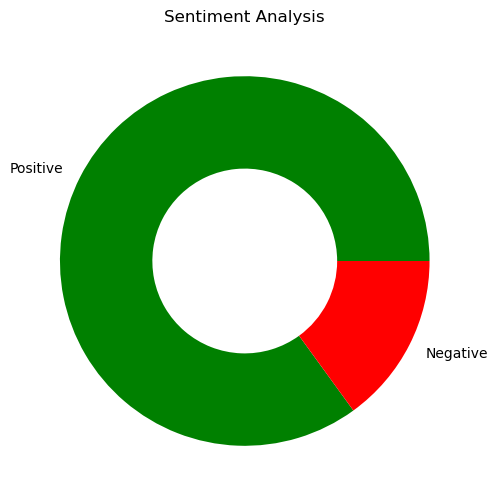

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
# put in the counts here in the positive and negative area
pos = 85
neg = 15
labels = ['Positive', 'Negative']
values = [pos, neg]

# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red'])
ax.set_title('Sentiment Analysis')

plt.show()

In [10]:
import requests

# Replace 'YOUR_API_KEY' with your actual Yelp API key
api_key = APIKEY

# Replace 'BUSINESS_ID' with the actual Yelp business ID
business_id = '5frcf3YK8Of3lpGbWcGmPw'

url = f'https://api.yelp.com/v3/businesses/{business_id}/reviews'

headers = {
    'Authorization': f'Bearer {api_key}',
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    reviews = data.get('reviews', [])
    for review in reviews:
        print(review['text'])
else:
    print(f"Error: {response.status_code}, {response.text}")


A beautiful little restaurant in the heart of Hoboken.  Perfect place to stop in for breakfast, lunch or dinner. Caffe Buon Gusto serves fresh, authentic...
My husband and I have been loving Caffe Buon Gusto for delivery! They have authentic Italian food and the portions are huge. The penne vodka is out of this...
RATS!! 

Do NOT go here!!

We got to the restaurant late around 9:45 and were having perfectly nice dinner on a Friday night. We were the only dinners left...
